# 第一步，导入相关的模块

In [3]:
from life.policy.ddpg import DDPG
from life.policy.trainer import train_ddpg
from life.envs.con_env_demo import make
from life.utils.replay.replay_buffer import ReplayBuffer
import torch
import matplotlib.pyplot as plt

# 第二步，设置超参数，并建立模型

In [2]:
# 设置超参数
actor_lr = 3e-4
critic_lr = 3e-3
num_episodes = 200
hidden_dim = 64
gamma = 0.98
tau = 0.005  # 软更新参数
buffer_size = 10000
minimal_size = 1000
batch_size = 64
sigma = 0.01  # 高斯噪声标准差
device = torch.device("cpu")

env=make()
replay_buffer = ReplayBuffer(buffer_size)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_bound = env.action_space.high[0]  # 动作最大值

# 建立模型
agent = DDPG(state_dim, action_dim, state_dim+action_dim,hidden_dim,
             False,action_bound, sigma, actor_lr, critic_lr, tau, gamma, device)

D:\anocoodaa\envs\zyhrl\lib\site-packages\gym\core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
D:\anocoodaa\envs\zyhrl\lib\site-packages\gym\wrappers\step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


# 第三步，训练模型

In [4]:
result=train_ddpg(env,agent,num_episodes,replay_buffer,minimal_size,batch_size)

Iteration 0:   0%|          | 0/20 [00:00<?, ?it/s]D:\Life\life\policy\ddpg.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 20/20 [00:13<00:00,  1.51it/s, episode=200, return=-511.479]


# 可视化每一轮的回报 (if you like)

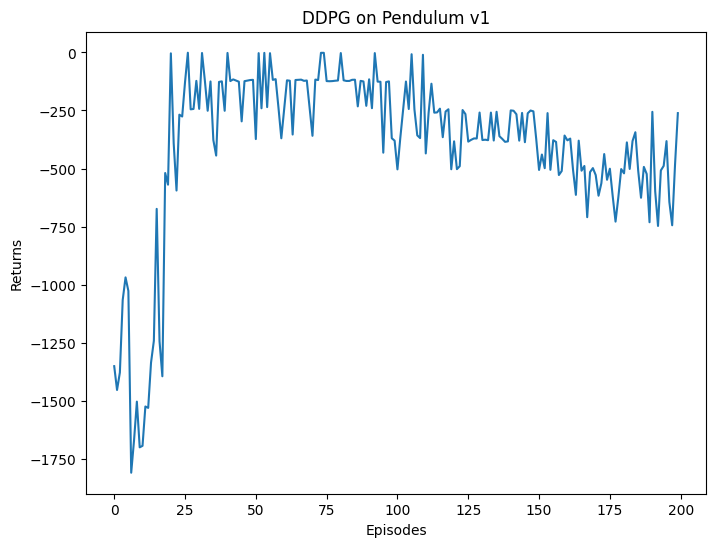

In [6]:
episodes_list = list(range(len(result)))
plt.figure(figsize=(8,6))
plt.plot(episodes_list, result)
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("DDPG on {}".format("Pendulum v1"))
plt.show()